## The aim of this notebook is to implement logistic regression using as few libraries as possible

In [27]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np


First let´s create the necessary functions

In [28]:
# Calculate the mean of a list
def mean(values):
    return sum(values) / len(values)

#Calculate the covariance between X and Y
def covariance(x, y):
    x_mean, y_mean = mean(x), mean(y)
    return sum((xi - x_mean) * (yi - y_mean) for xi, yi in zip(x, y))

# Calculate the variance of X
def variance(x):
    x_mean = mean(x)
    return sum((xi - x_mean) ** 2 for xi in x)

# Compute the coefficients of linear regression (slope and intercept)
def linear_regression(x, y):
    b1 = covariance(x, y) / variance(x)  # Compute the slope
    b0 = mean(y) - b1 * mean(x)  # Compute the intercept
    return b0, b1

# Predict values using the regression model
def predict(x, b0, b1):
    return [b0 + b1 * xi for xi in x]

# Function to calculate Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return sum((yi - y_hat) ** 2 for yi, y_hat in zip(y_true, y_pred)) / len(y_true)

# Function to calculate R-squared (coefficient of determination)
def r_squared(y_true, y_pred):
    y_mean = mean(y_true)
    ss_total = sum((yi - y_mean) ** 2 for yi in y_true)
    ss_residual = sum((yi - y_hat) ** 2 for yi, y_hat in zip(y_true, y_pred))
    return 1 - (ss_residual / ss_total)

Now let´s test our algorithm with some random data

Equation of the line: y = 1441.20x + 3042.24
Predictions: [14739.414782137268, 30516.694621651088, 24527.512056098276, 20876.409884703044, 8755.678283416579, 8755.017806647531, 6073.940051251183, 28201.800538842035, 20943.676560937518, 23872.47741143671]


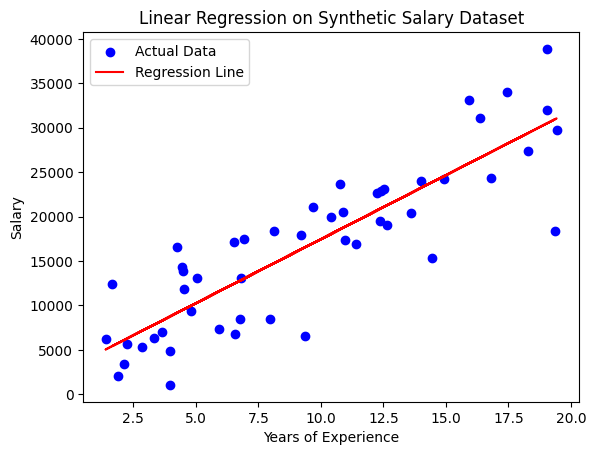

Mean Squared Error (MSE): 20576778.59
R-squared: 0.7488


In [29]:
# Generate synthetic dataset (Years of Experience vs. Salary)
n = 50  # Number of data points
np.random.seed(42)
x_values = np.random.uniform(1, 20, n)  # Random years of experience between 1 and 20
y_values = 2500 + 1500 * x_values + np.random.normal(0, 5000, n)  # Salary with some noise

# Compute coefficients
b0, b1 = linear_regression(x_values, y_values)
print(f"Equation of the line: y = {b1:.2f}x + {b0:.2f}")

# Make predictions
predictions = predict(x_values, b0, b1)
print("Predictions:", predictions[:10])  # Show first 10 predictions

# Plot the results
plt.scatter(x_values, y_values, color='blue', label='Actual Data')  # Scatter plot of real data
plt.plot(x_values, predictions, color='red', label='Regression Line')  # Regression line
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression on Synthetic Salary Dataset")
plt.legend()
plt.show()


# Compute evaluation metrics
mse = mean_squared_error(y_values, predictions)
r2 = r_squared(y_values, predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.4f}")



